1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

3. Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
water = pd.read_csv('water.csv').iloc[:, 1:]
water.head(7)

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [35]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

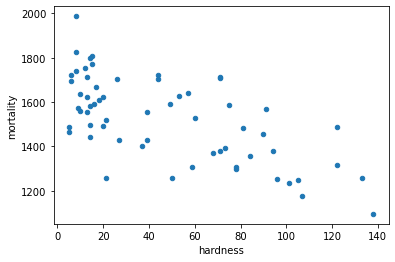

In [36]:
water.plot(kind='scatter', x='hardness', y='mortality')
# Похоже, есть обратная зависимость: чем жестче вода, тем выше смертность

In [37]:
# Коэффициент Пирсона
water.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [38]:
# Коэффициент Спирмана
water.corr('spearman')
# Оба коэффициента указывают на существование обратной зависимости между переменными

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [39]:
# Строю модель линейной регрессии
x = water[['hardness']]
y = water['mortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
model.coef_

array([-3.13167087])

In [42]:
model.intercept_

1668.9722977277095

In [43]:
model.score(x_test, y_test)
# Коэффициент детерминации не очень большой, значит, получилась не очень точная модель.

0.5046490611017092

In [47]:
y_pred = model.predict(x_test)

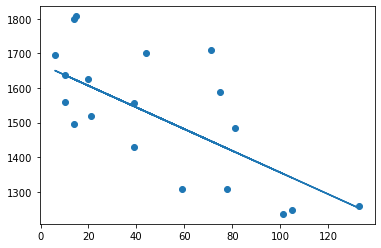

In [48]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)

### То же для северных и южных городов

In [52]:
water_north = water[water['location'] == 'North']
water_north.shape

(35, 4)

In [74]:
water_south = water[water['location'] == 'South']
water_south.shape

(26, 4)

In [75]:
print('Коэффициент Пирсона для северных городов равен:', f'{water_north.corr()}', 
      'Коэффициент Спирмана для северных городов равен:', f'{water_north.corr("spearman")}',
      'Коэффициент Пирсона для южных городов равен:', f'{water_south.corr()}', 
      'Коэффициент Спирмана для южных городов равен:', f'{water_south.corr("spearman")}', sep='\n\n')
# Коэффициенты корреляции для северных городов ниже, чем на общей выборке, значит, связь гораздо более слабая.
# Для южных городов коэффициенты примерно такие же, как на общей выборке

Коэффициент Пирсона для северных городов равен:

           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000

Коэффициент Спирмана для северных городов равен:

           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000

Коэффициент Пирсона для южных городов равен:

           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000

Коэффициент Спирмана для южных городов равен:

           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


In [82]:
# Теперь одновременно построю модели для северной и южной выборки с помощью sklearn
# Строю модель линейной регрессии
xn = water_north[['hardness']]
yn = water_north['mortality']

xs = water_south[['hardness']]
ys = water_south['mortality']

xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.30, random_state=42)
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.30, random_state=42)

In [83]:
nmodel = LinearRegression()
smodel = LinearRegression()

nmodel.fit(xn_train, yn_train)
smodel.fit(xs_train, ys_train)

LinearRegression()

In [84]:
print(f'Коэффициент для северных городов: {nmodel.coef_}', f'Остаток для северных городов: {nmodel.intercept_}',
     f'Коэффициент для южных городов: {smodel.coef_}', f'Остаток для южных городов: {smodel.intercept_}', sep='\n\n')

Коэффициент для северных городов: [-1.97686226]

Остаток для северных городов: 1688.150229031281

Коэффициент для южных городов: [-3.51342921]

Остаток для южных городов: 1640.2204603423374


In [87]:
print(f'Коэффициент детерминации для северных городов: {nmodel.score(xn_test, yn_test)}',
     f'Коэффициент детерминации для южных городов: {smodel.score(xs_test, ys_test)}', sep='\n')
# Для северных городов коэффициент детерминации очень маленький, а для южных городов он вообще оказался отрицательным.
# Значит, модель не объясняет отдельные части выборки вообще, а в случае южных городов в принципе неадекватна.

Коэффициент детерминации для северных городов: 0.018885304285745863
Коэффициент детерминации для южных городов: -2.551922301235205


In [89]:
yn_pred = nmodel.predict(xn_test)
ys_pred = smodel.predict(xs_test)

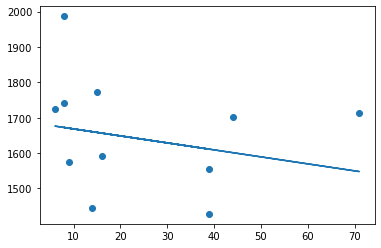

In [97]:
plt.scatter(xn_test, yn_test)
plt.plot(xn_test, yn_pred)

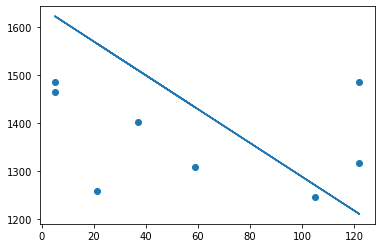

In [93]:
plt.scatter(xs_test, ys_test)
plt.plot(xs_test, ys_pred)

In [ ]:
# Получились грустные графики остатков, которые демонстрируют беспомощность модели линейной регрессии на малых выборках.